In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
!pip install fastai
from fastai.vision.all import *

In [3]:
!pip install timm
import timm

In [4]:
from zipfile import ZipFile
file_name = 'archive 1.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
!nvidia-smi

Fri Feb 14 12:54:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.42                 Driver Version: 572.42         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              9W /   35W |     126MiB /   4096MiB |     11%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
path='dataset_blood_group'

In [7]:
tfms=aug_transforms(max_rotate=0.29999999993, max_zoom=0.002, 
                              max_lighting=0.2,
                              max_warp=0.02,
                              p_lighting=0.75,
                              
    #max_rotate=30,     
    #max_zoom=1.5,    
        
    #max_lighting=0.2,          
    #p_lighting=0.75,
    )

In [8]:

dls=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(226),
    batch_tfms=[*tfms, Normalize.from_stats(*imagenet_stats)]
).dataloaders(path,bs=32,
              #num_workers=4
              )

In [9]:
print(dls.vocab)

['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


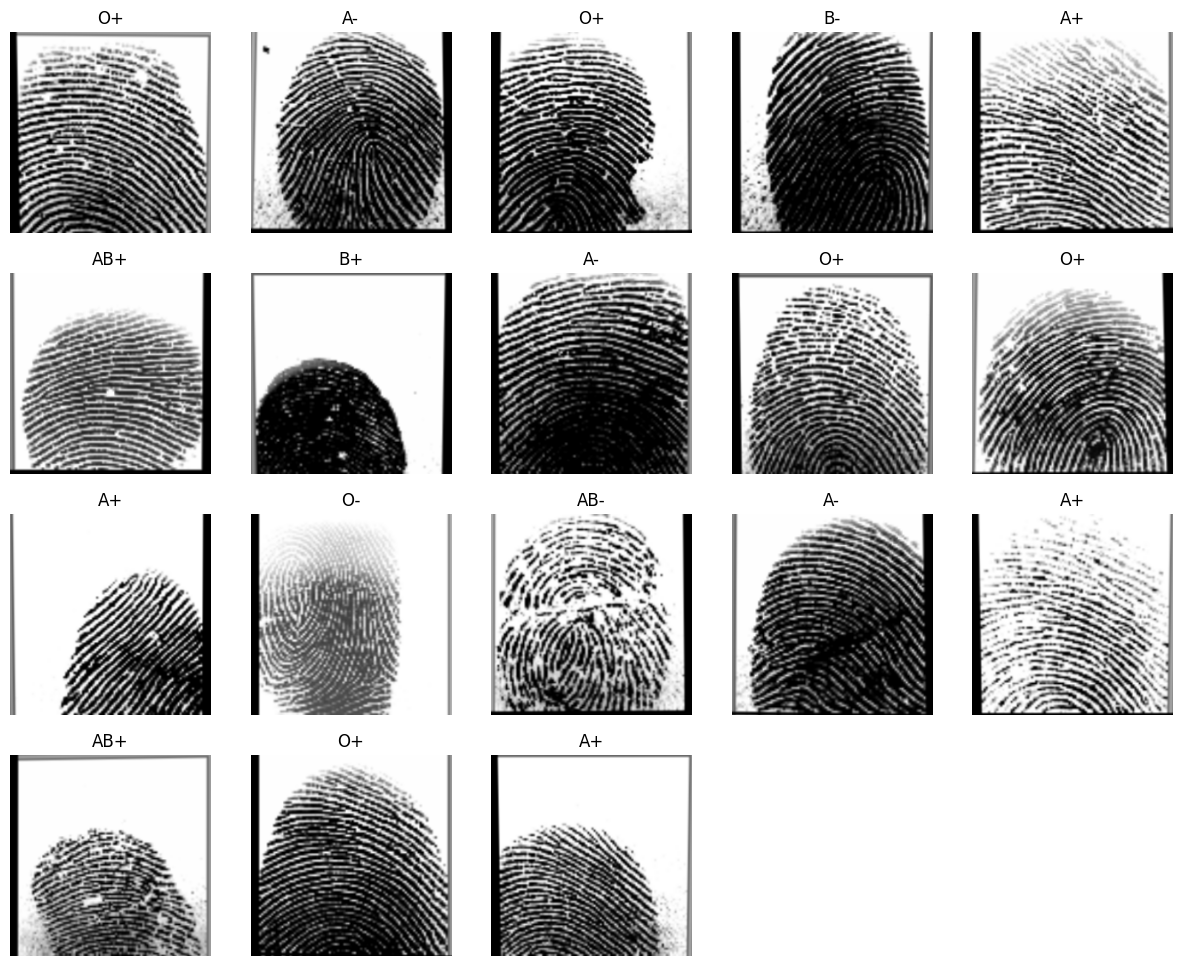

In [10]:

dls.show_batch(max_n=18)


In [11]:
timm.list_models('resnet*')

['resnet10t',
 'resnet14t',
 'resnet18',
 'resnet18d',
 'resnet26',
 'resnet26d',
 'resnet26t',
 'resnet32ts',
 'resnet33ts',
 'resnet34',
 'resnet34d',
 'resnet50',
 'resnet50_clip',
 'resnet50_clip_gap',
 'resnet50_gn',
 'resnet50_mlp',
 'resnet50c',
 'resnet50d',
 'resnet50s',
 'resnet50t',
 'resnet50x4_clip',
 'resnet50x4_clip_gap',
 'resnet50x16_clip',
 'resnet50x16_clip_gap',
 'resnet50x64_clip',
 'resnet50x64_clip_gap',
 'resnet51q',
 'resnet61q',
 'resnet101',
 'resnet101_clip',
 'resnet101_clip_gap',
 'resnet101c',
 'resnet101d',
 'resnet101s',
 'resnet152',
 'resnet152c',
 'resnet152d',
 'resnet152s',
 'resnet200',
 'resnet200d',
 'resnetaa34d',
 'resnetaa50',
 'resnetaa50d',
 'resnetaa101d',
 'resnetblur18',
 'resnetblur50',
 'resnetblur50d',
 'resnetblur101d',
 'resnetrs50',
 'resnetrs101',
 'resnetrs152',
 'resnetrs200',
 'resnetrs270',
 'resnetrs350',
 'resnetrs420',
 'resnetv2_18',
 'resnetv2_18d',
 'resnetv2_34',
 'resnetv2_34d',
 'resnetv2_50',
 'resnetv2_50d',
 'resne

In [12]:
#!pip install -U fastai torch

In [13]:
#import torch
#print(torch.cuda.is_available())  # Should return True if CUDA is available

In [14]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())

2.5.1
12.4
True


In [15]:
learn=vision_learner(dls,resnet18,cbs=MixedPrecision(),metrics=accuracy)
#learn=vision_learner(dls,'convnextv2_large',cbs=MixedPrecision(),metrics=error_rate)
#learn=vision_learner(dls,'resnet101d',cbs=MixedPrecision(),metrics=accuracy)
#learn=vision_learner(dls,'resnetv2_50',cbs=MixedPrecision(),metrics=accuracy)
learn.fine_tune(25)

C:\Users\DELL\.conda\envs\pytorch_gpu\lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
C:\Users\DELL\.conda\envs\pytorch_gpu\lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,2.033053,1.231766,0.543333,03:33


epoch,train_loss,valid_loss,accuracy,time
0,1.263916,0.693130,0.744167,01:33
1,0.880178,0.482864,0.820000,01:33
2,0.637377,0.478257,0.820833,01:33
3,0.574487,0.392323,0.850000,01:28
4,0.545478,0.404955,0.848333,01:36
5,0.473049,0.322817,0.883333,01:32
6,0.429963,0.305941,0.874167,01:35
7,0.393123,0.429440,0.839167,01:38
8,0.360265,0.310876,0.884167,01:37
9,0.332101,0.334109,0.873333,01:29


In [16]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(20, lr_max=slice(1e-18, 1e-7))

epoch,train_loss,valid_loss,accuracy,time
0,0.048004,0.306549,0.890000,00:37
1,0.039853,0.303292,0.895833,00:37
2,0.033490,0.311150,0.890000,00:38
3,0.030759,0.308318,0.890000,00:38
4,0.032489,0.299135,0.901667,00:37
5,0.035520,0.311284,0.888333,00:38
6,0.043970,0.295981,0.899167,00:37
7,0.035686,0.303834,0.898333,00:38
8,0.039624,0.315566,0.887500,00:38
9,0.034344,0.315534,0.887500,00:39


In [18]:
#from fastai.losses import LabelSmoothingCrossEntropy
#learn=vision_learner(dls,'convnextv2_base',cbs=MixedPrecision(),loss_func=LabelSmoothingCrossEntropy(),metrics=error_rate)
#learn.fine_tune(20)

In [34]:

preds, targs = learn.tta()
accuracy = (preds.argmax(dim=1) == targs).float().mean()
print(f'TTA Accuracy: {accuracy*100:.4f}%')

TTA Accuracy: 90.7500%


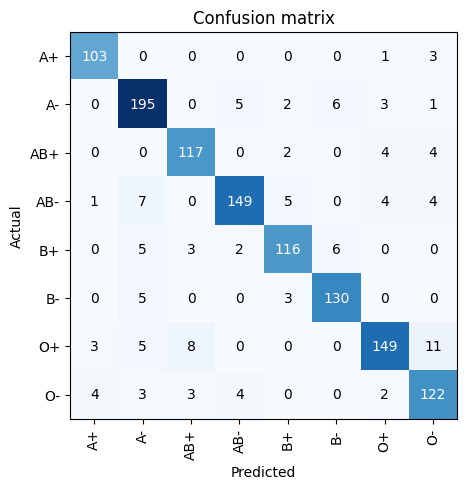

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

C:\Users\DELL\.conda\envs\pytorch_gpu\lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
C:\Users\DELL\.conda\envs\pytorch_gpu\lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


C:\Users\DELL\.conda\envs\pytorch_gpu\lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **t

SuggestedLRs(valley=5.754399353463668e-06)

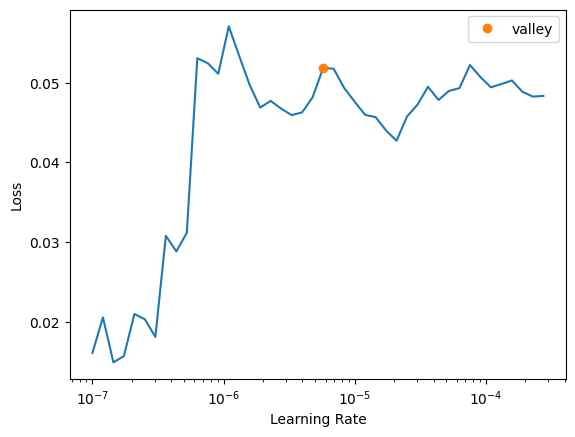

In [21]:
learn.lr_find()

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

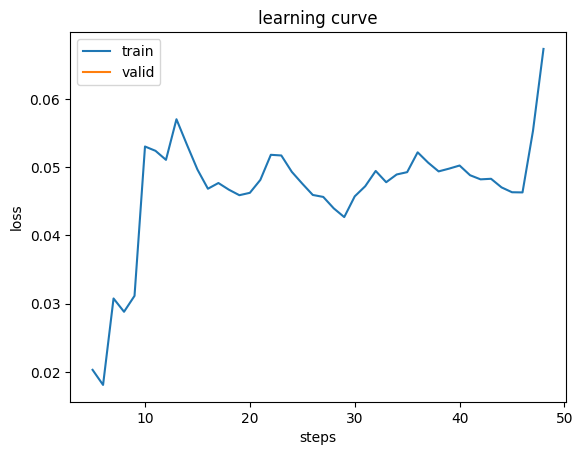

In [22]:
learn.recorder.plot_loss()

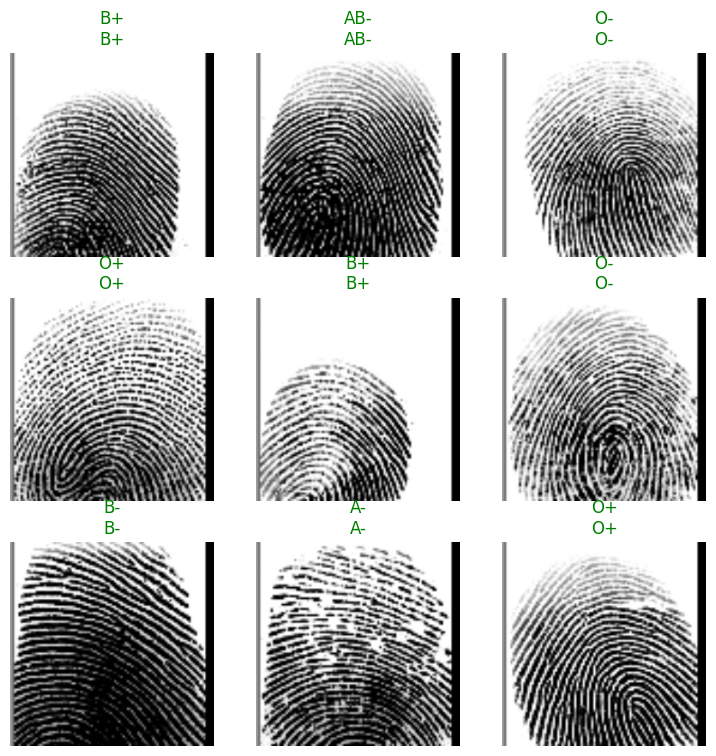

In [23]:
learn.show_results()

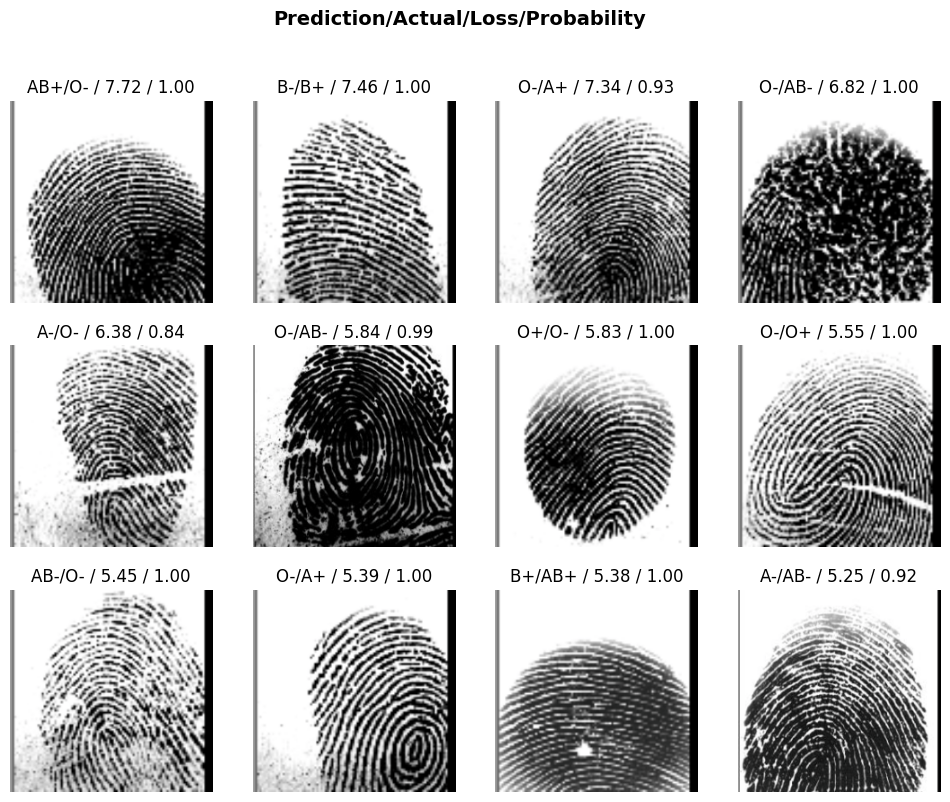

In [24]:
interp.plot_top_losses(12)

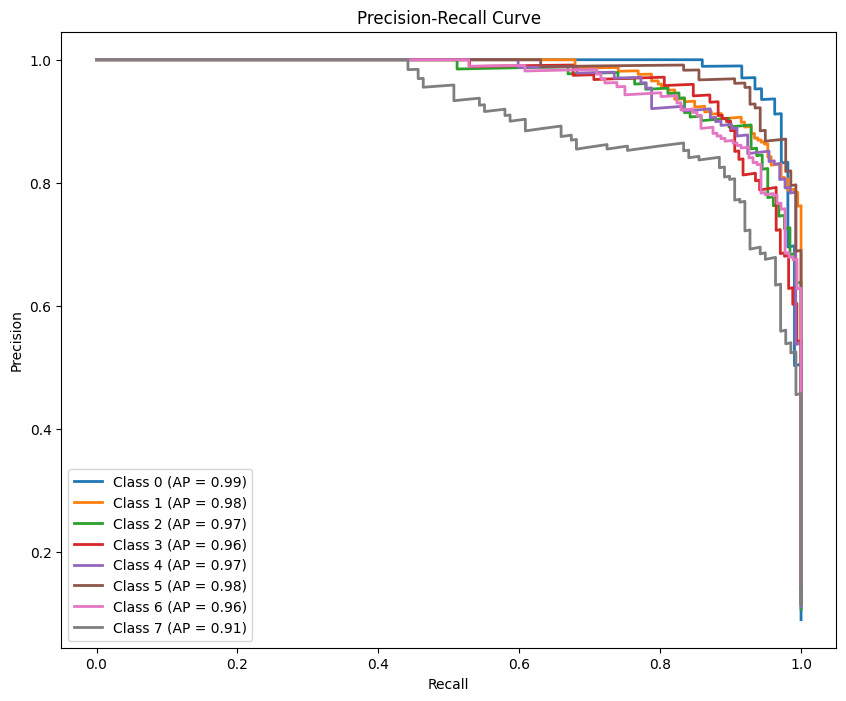

In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

preds, targs = learn.get_preds()
preds = preds.numpy()  
targs = targs.numpy()


n_classes = preds.shape[1]
precision = dict()
recall = dict()
average_precision = dict()


for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(targs == i, preds[:, i])
    average_precision[i] = average_precision_score(targs == i, preds[:, i])


plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

C:\Users\DELL\.conda\envs\pytorch_gpu\lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
C:\Users\DELL\.conda\envs\pytorch_gpu\lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


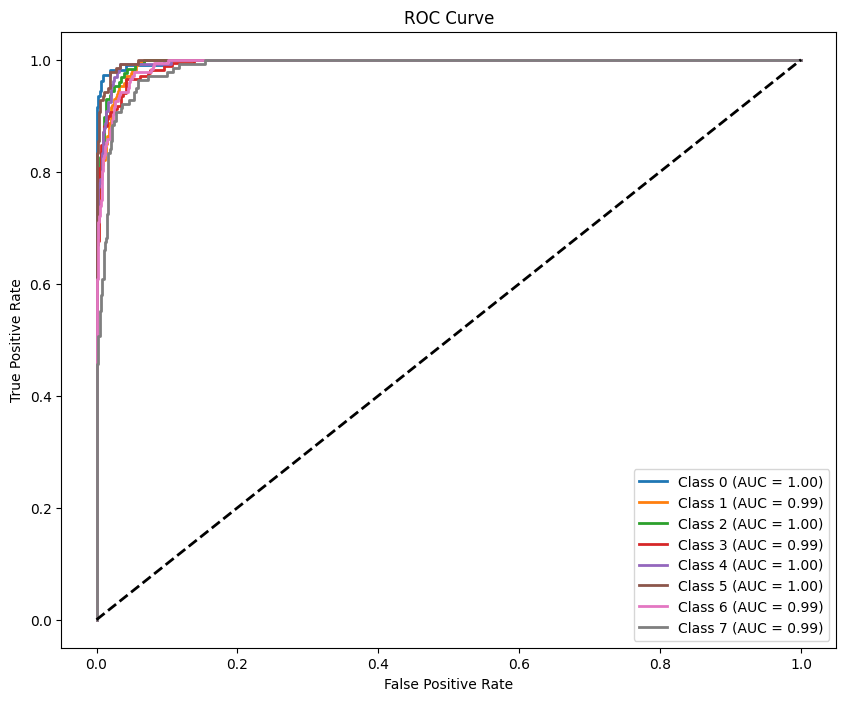

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


preds, targs = learn.get_preds()
preds = preds.numpy()  
targs = targs.numpy()


n_classes = preds.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(targs == i, preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [28]:
from zipfile import ZipFile
file_name = 'TEST.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [31]:
from fastai.vision.all import *
img = PILImage.create("TEST/O+/augmented_cluster_6_546.BMP")
pred_class, pred_idx, pred_probs = learn.predict(img)
print(f"Predicted Class: {pred_class}")
print(f"Predicted Probabilities: {pred_probs}")

Predicted Class: O+
Predicted Probabilities: tensor([2.0465e-02, 3.5076e-01, 1.1790e-04, 1.6059e-01, 3.6713e-03, 2.4878e-02,
        4.2892e-01, 1.0592e-02])
